In [ ]:
#1
# Import the required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("Pavement_Condition_Data_2022.csv")

# Print dataset information and preview the first five rows
print("---- Dataset Information ----")
df.info()
print("\n---- First 5 Rows ----")
print(df.head())

# Print summary statistics to understand the distribution of numerical variables
print("\n---- Summary Statistics ----")
print(df.describe())

# Calculate the average overall condition index by district.
avg_condition_by_district = df.groupby("district")["overal_condition_index"].mean()
print("\n---- Average Overall Condition Index by District ----")
print(avg_condition_by_district)

# Calculate the average pavement condition rating by the functional class name.
avg_rating_by_class = df.groupby("nm_funct_class_name")["pavement_condition_rating"].mean()
print("\n---- Average Pavement Condition Rating by Functional Class ----")
print(avg_rating_by_class)

# Compute the correlation among critical quantitative attributes: hpms cracking percentage, average IRI, and nm_rutting_measure.
print("\n---- Correlation Among Pavement Performance Metrics ----")
print(df[["hpms_cracking_percentage", "average_iri", "nm_rutting_measure"]].corr())


---- Dataset Information ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144944 entries, 0 to 144943
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       144944 non-null  int64  
 1   route_name                 144944 non-null  object 
 2   direction                  144944 non-null  object 
 3   district                   144944 non-null  object 
 4   begin_mile                 144944 non-null  float64
 5   end_mile                   144944 non-null  float64
 6   length                     144944 non-null  float64
 7   lane_miles                 144935 non-null  float64
 8   latitude                   144944 non-null  float64
 9   longitude                  144944 non-null  float64
 10  divided_undivided          144944 non-null  object 
 11  nhs                        144944 non-null  int64  
 12  nm_funct_class_name        144944 non-null  object 
 13 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144944 entries, 0 to 144943
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       144944 non-null  int64  
 1   route_name                 144944 non-null  object 
 2   direction                  144944 non-null  object 
 3   district                   144944 non-null  object 
 4   begin_mile                 144944 non-null  float64
 5   end_mile                   144944 non-null  float64
 6   length                     144944 non-null  float64
 7   lane_miles                 144935 non-null  float64
 8   latitude                   144944 non-null  float64
 9   longitude                  144944 non-null  float64
 10  divided_undivided          144944 non-null  object 
 11  nhs                        144944 non-null  int64  
 12  nm_funct_class_name        144944 non-null  object 
 13  overal_conditio

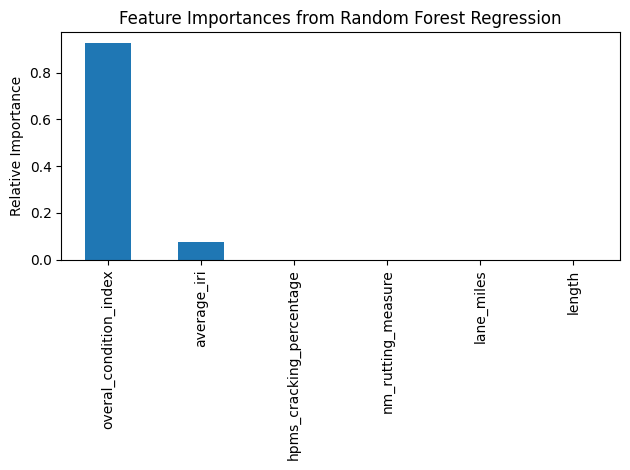


Random Forest Classification CV accuracy scores: [0.99879144 0.9988346  0.99840297 0.99866195 0.99909358]
Random Forest Classification Accuracy on Test set: 0.9988605365836815

Classification Report (RF):
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      9726
         Low       1.00      1.00      1.00      9702
      Medium       1.00      1.00      1.00      9533

    accuracy                           1.00     28961
   macro avg       1.00      1.00      1.00     28961
weighted avg       1.00      1.00      1.00     28961


Gradient Boosting Classification CV accuracy scores: [0.99879144 0.99896409 0.99870511 0.99879144 0.99905041]
Gradient Boosting Classification Accuracy on Test set: 0.9992058285280204

Classification Report (GB):
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      9726
         Low       1.00      1.00      1.00      9702
      Medium       1.00      1.00   

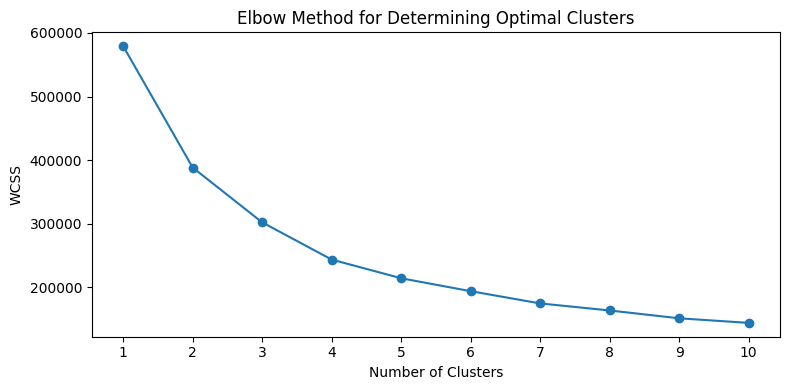


Cluster counts:
cluster
0    80835
2    40327
1    23639
Name: count, dtype: int64


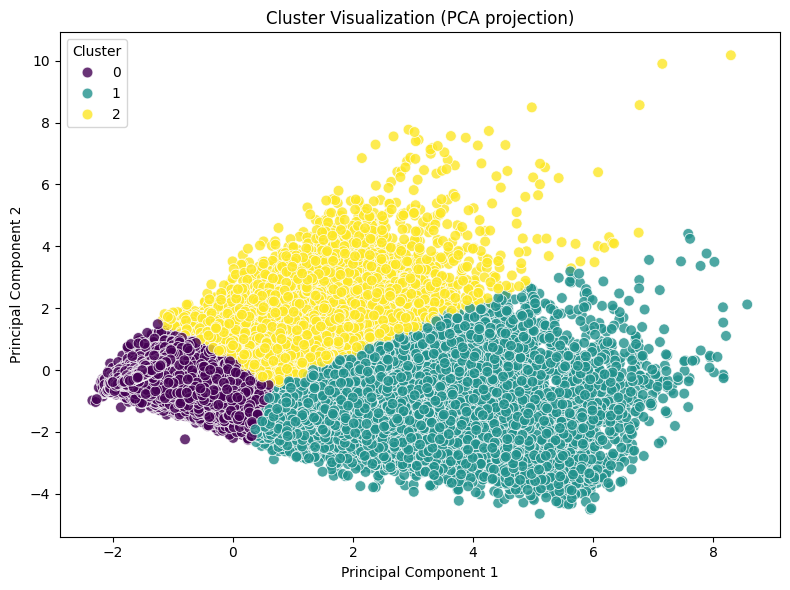


Cluster summary (mean values):
         overal_condition_index  hpms_cracking_percentage  average_iri  \
cluster                                                                  
0                     70.595757                  2.173888    83.286151   
1                     32.182030                 21.028195   157.390922   
2                     67.279465                  4.245106   219.499938   

         nm_rutting_measure  
cluster                      
0                  0.134077  
1                  0.255784  
2                  0.264888  


In [ ]:

# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


# 1. Load and Preprocess the Dataset
df = pd.read_csv("Pavement_Condition_Data_2022.csv")

# Print basic information and inspect the first few rows
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

# Drop rows with missing values for simplicity
df = df.dropna()


# 2. Regression Analysis to Predict Pavement Condition Rating
# Our goal: Predict the continuous pavement_condition_rating using selected numerical features.
# Here we choose features reflecting both inherent pavement quality and geometric measures.
features_reg = ["overal_condition_index", "hpms_cracking_percentage", "average_iri", "nm_rutting_measure", "length", "lane_miles"]
target_reg = "pavement_condition_rating"

X_reg = df[features_reg]
y_reg = df[target_reg]

# Split data into training and hold-out test sets (80-20 split)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# a) Random Forest Regression
rf_reg = RandomForestRegressor(random_state=42)
# Evaluate model by cross-validation on training data:
cv_scores_rf = cross_val_score(rf_reg, X_train_reg, y_train_reg, cv=5, scoring='r2')
print("\nRandom Forest Regression CV R2 scores:", cv_scores_rf)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)
print("Random Forest Regression R2 on Test set:", r2_score(y_test_reg, y_pred_rf))
print("Random Forest Regression MAE on Test set:", mean_absolute_error(y_test_reg, y_pred_rf))

# b) Gradient Boosting Regression
gb_reg = GradientBoostingRegressor(random_state=42)
cv_scores_gb = cross_val_score(gb_reg, X_train_reg, y_train_reg, cv=5, scoring='r2')
print("\nGradient Boosting Regression CV R2 scores:", cv_scores_gb)
gb_reg.fit(X_train_reg, y_train_reg)
y_pred_gb = gb_reg.predict(X_test_reg)
print("Gradient Boosting Regression R2 on Test set:", r2_score(y_test_reg, y_pred_gb))
print("Gradient Boosting Regression MAE on Test set:", mean_absolute_error(y_test_reg, y_pred_gb))

# c) Neural Network Regression (MLPRegressor)
mlp_reg = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
cv_scores_mlp = cross_val_score(mlp_reg, X_train_reg, y_train_reg, cv=5, scoring='r2')
print("\nNeural Network Regression CV R2 scores:", cv_scores_mlp)
mlp_reg.fit(X_train_reg, y_train_reg)
y_pred_mlp = mlp_reg.predict(X_test_reg)
print("Neural Network Regression R2 on Test set:", r2_score(y_test_reg, y_pred_mlp))
print("Neural Network Regression MAE on Test set:", mean_absolute_error(y_test_reg, y_pred_mlp))

# Hyperparameter Tuning with GridSearchCV (example on Random Forest)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train_reg, y_train_reg)
print("\nBest parameters for RF Regression:", grid_rf.best_params_)
print("Best CV R2 score from GridSearchCV:", grid_rf.best_score_)

# Evaluate the best model on test data
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_reg)
print("Optimized Random Forest Regression R2 on Test set:", r2_score(y_test_reg, y_pred_best_rf))
print("Optimized RF Regression MAE on Test set:", mean_absolute_error(y_test_reg, y_pred_best_rf))

# Feature Importance from Random Forest
importances = pd.Series(best_rf.feature_importances_, index=features_reg).sort_values(ascending=False)
print("\nFeature importances (RF):")
print(importances)
importances.plot(kind='bar', title="Feature Importances from Random Forest Regression")
plt.ylabel("Relative Importance")
plt.tight_layout()
plt.show()


# 3. Classification Analysis by Binning Pavement Condition Rating
# To apply classification techniques, we convert the continuous pavement condition rating to discrete bins.
# Here we use quantiles (tertiles) to define 3 rating classes: Low, Medium, High.
df['rating_class'] = pd.qcut(df['pavement_condition_rating'], q=3, labels=["Low", "Medium", "High"])

# For classification we can use a similar feature set as in regression
features_clf = features_reg  # using the same numeric predictors
target_clf = "rating_class"

X_clf = df[features_clf]
y_clf = df[target_clf]

# Encode target labels (if needed)
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

# Split into training and test sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf_encoded, test_size=0.2, random_state=42)

# a) Random Forest Classification
rf_clf = RandomForestClassifier(random_state=42)
cv_scores_rf_clf = cross_val_score(rf_clf, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print("\nRandom Forest Classification CV accuracy scores:", cv_scores_rf_clf)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)
print("Random Forest Classification Accuracy on Test set:", accuracy_score(y_test_clf, y_pred_rf_clf))
print("\nClassification Report (RF):")
print(classification_report(y_test_clf, y_pred_rf_clf, target_names=le.classes_))

# b) Gradient Boosting Classification
gb_clf = GradientBoostingClassifier(random_state=42)
cv_scores_gb_clf = cross_val_score(gb_clf, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print("\nGradient Boosting Classification CV accuracy scores:", cv_scores_gb_clf)
gb_clf.fit(X_train_clf, y_train_clf)
y_pred_gb_clf = gb_clf.predict(X_test_clf)
print("Gradient Boosting Classification Accuracy on Test set:", accuracy_score(y_test_clf, y_pred_gb_clf))
print("\nClassification Report (GB):")
print(classification_report(y_test_clf, y_pred_gb_clf, target_names=le.classes_))

# Neural Network Classification (MLPClassifier)
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
cv_scores_mlp_clf = cross_val_score(mlp_clf, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
print("\nNeural Network Classification CV accuracy scores:", cv_scores_mlp_clf)
mlp_clf.fit(X_train_clf, y_train_clf)
y_pred_mlp_clf = mlp_clf.predict(X_test_clf)
print("Neural Network Classification Accuracy on Test set:", accuracy_score(y_test_clf, y_pred_mlp_clf))
print("\nClassification Report (MLP):")
print(classification_report(y_test_clf, y_pred_mlp_clf, target_names=le.classes_))


# 4. Unsupervised Cluster Analysis of Road Deterioration Patterns
# We aim to identify groups of road segments with similar deterioration patterns.
# We use key quantitative metrics: overall condition index, cracking percentage, average IRI, and rutting measure.
features_cluster = ["overal_condition_index", "hpms_cracking_percentage", "average_iri", "nm_rutting_measure"]
X_cluster = df[features_cluster]

# Standardize features to ensure equal weight in clustering
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Determining an appropriate number of clusters using the elbow method
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Determining Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

# Suppose the elbow suggests that 3 clusters is a good choice.
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)
print("\nCluster counts:")
print(df['cluster'].value_counts())

# Visualize clusters in a 2D projection using PCA for simplicity
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', s=60, alpha=0.8)
plt.title("Cluster Visualization (PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Display the mean values of deterioration metrics per cluster
cluster_summary = df.groupby('cluster')[features_cluster].mean()
print("\nCluster summary (mean values):")
print(cluster_summary)


# 5. Summary of Validation and Feature Selection
# The predictive models (both regression and classification) above were validated using cross‑validation.
# In addition, hyperparameter tuning via GridSearchCV was performed for the Random Forest regressor.
# Feature importances from the optimized Random Forest regression indicate which predictors are most influential.
# These results (and similar evaluations for classification models) establish a framework for refining model accuracy.

# Next steps include:
# •	Exploring additional feature engineering (e.g., encoding categorical variables from 'nm_funct_class_name')
# •	Using Recursive Feature Elimination (RFE) or similar methods for further feature selection.
# •	Integrating dynamic external factors (e.g., traffic load, weather) into the analysis.


Reading dataset...
--- Exploratory Data Analysis (EDA) ---
Descriptive Statistics:
       overal_condition_index  pavement_condition_rating  \
count           144944.000000              144932.000000   
mean                63.413787                  65.908038   
std                 21.131810                  18.273058   
min                  0.000000                   0.000000   
25%                 46.000000                  52.883240   
50%                 68.000000                  68.037920   
75%                 83.000000                  82.400000   
max                100.000000                 100.000000   

       hpms_cracking_percentage    average_iri  nm_rutting_measure  
count             144944.000000  144822.000000       144944.000000  
mean                   5.829609     133.320759            0.190421  
std                    8.859866      85.487640            0.098858  
min                    0.000000       0.000000            0.010000  
25%                    0.100000

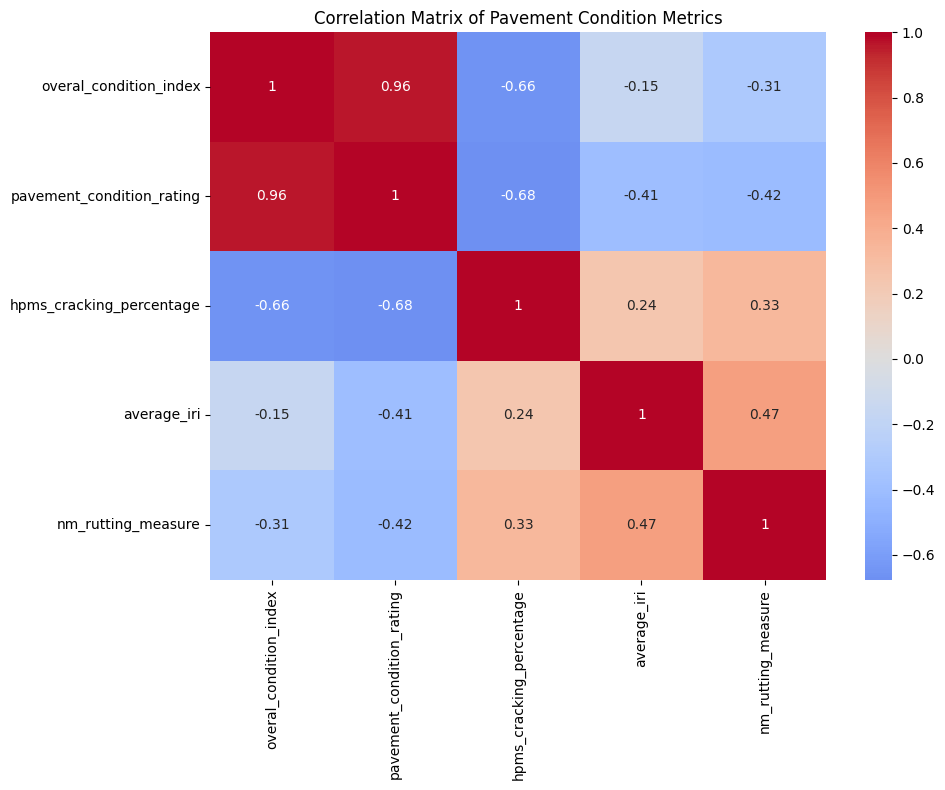

Interpretation: The correlation heatmap shows the linear relationships among the metrics. For example, a strong correlation between 'overal_condition_index' and 'pavement_condition_rating' could be observed.
--- Clustering Analysis ---
Cluster Counts:
cluster
0    56247
1    42405
2    33848
3    12444
Name: count, dtype: int64
Cluster Mean Statistics:
         overal_condition_index  hpms_cracking_percentage  average_iri  \
cluster                                                                  
0                     80.487742                  1.066155    83.424795   
1                     46.609056                  6.614583   105.853119   
2                     69.550579                  4.571390   232.001656   
3                     26.812038                 28.107923   184.064581   

         nm_rutting_measure  
cluster                      
0                  0.127575  
1                  0.174738  
2                  0.275365  
3                  0.296879  
Interpretation: The 

<ipython-input-8-bea8111b5e76>:81: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


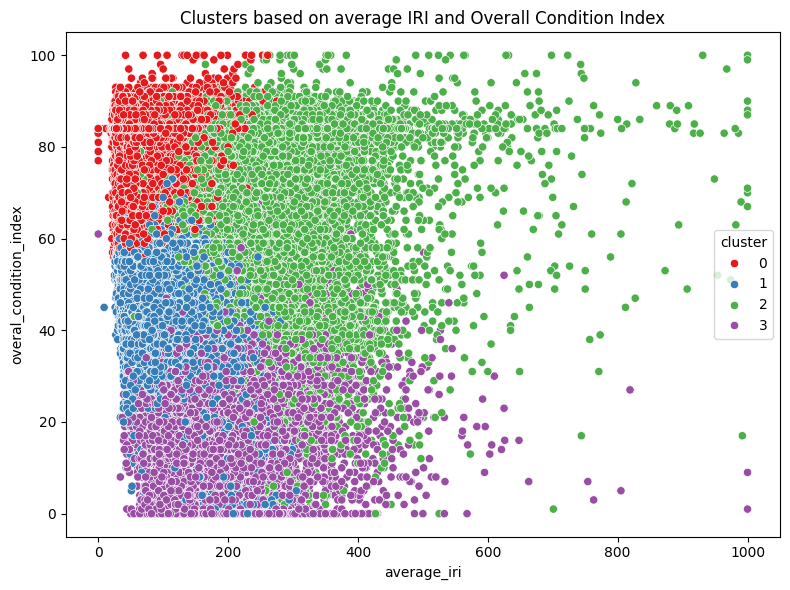

--- Modeling and Forecasting ---

Random Forest Model Performance:
R-squared Score: 0.4492
Root Mean Square Error: 15.6919


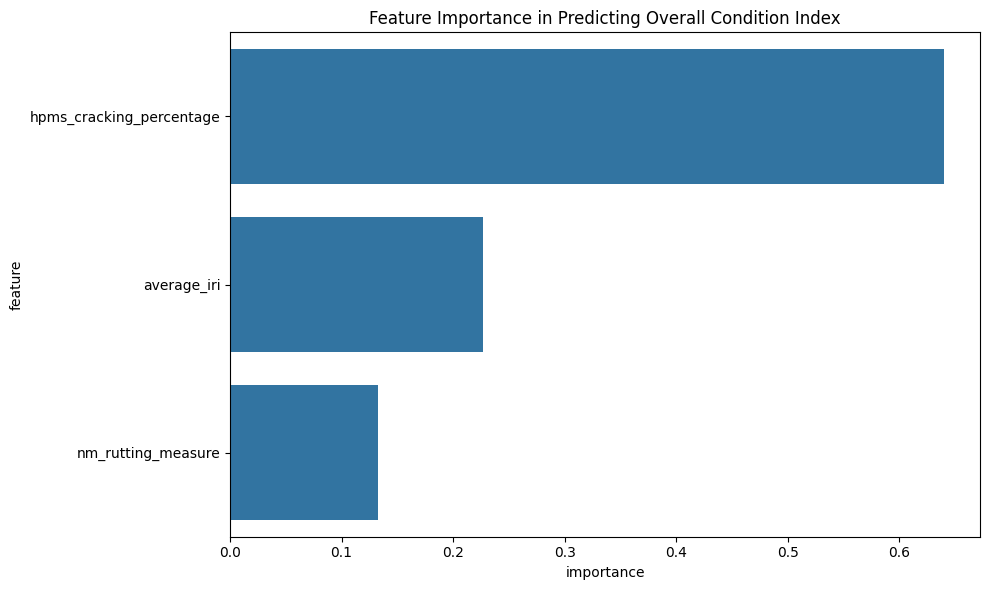

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import folium

# Read the data
print("Reading dataset...")
df = pd.read_csv('Pavement_Condition_Data_2022.csv')


# Exploratory Data Analysis (EDA)

print("\
--- Exploratory Data Analysis (EDA) ---")

# Focus on a subset of condition related columns for correlation
eda_columns = ['overal_condition_index', 'pavement_condition_rating',
               'hpms_cracking_percentage', 'average_iri', 'nm_rutting_measure']
condition_df = df[eda_columns]

# Print basic descriptive statistics
print("\
Descriptive Statistics:")
print(condition_df.describe())
print("\
Interpretation: The summary above shows the mean, std, min, max, and quartile values for key pavement condition metrics. It helps identify the spread and central tendency of the data.")

# Generate and show a correlation heatmap
correlation_matrix = condition_df.corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Pavement Condition Metrics')
plt.tight_layout()
plt.show()
print("Interpretation: The correlation heatmap shows the linear relationships among the metrics. For example, a strong correlation between 'overal_condition_index' and 'pavement_condition_rating' could be observed.")


# Clustering Analysis

print("\
--- Clustering Analysis ---")

# Select features for clustering. Fill missing values if any.
features_for_clustering = ['overal_condition_index', 'hpms_cracking_percentage', 'average_iri', 'nm_rutting_measure']
X_cluster = df[features_for_clustering].copy()
X_cluster = X_cluster.fillna(X_cluster.mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters

# Print cluster count
print("Cluster Counts:")
print(df['cluster'].value_counts())

# Print mean values of each cluster
cluster_stats = df.groupby('cluster')[features_for_clustering].mean()
print("\
Cluster Mean Statistics:")
print(cluster_stats)
print("\
Interpretation: The cluster analysis groups the records into " + str(n_clusters) + " clusters. The mean values per cluster indicate the typical condition profiles within each group.")

# Visualize clusters using a scatter plot of two selected features
plt.figure(figsize=(8,6))
scatter_plot = sns.scatterplot(x='average_iri', y='overal_condition_index', hue='cluster', data=df, palette='Set1')
plt.title('Clusters based on average IRI and Overall Condition Index')
plt.tight_layout()
plt.show()


# Modeling and Forecasting

print("\
--- Modeling and Forecasting ---")

# Prepare data for regression: Predict overall condition index based on cracking, IRI, and rutting
model_features = ['hpms_cracking_percentage', 'average_iri', 'nm_rutting_measure']
X_model = df[model_features].copy()
X_model = X_model.fillna(X_model.mean())
y_model = df['overal_condition_index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Train Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRandom Forest Model Performance:")
print("R-squared Score: " + str(round(r2, 4)))
print("Root Mean Square Error: " + str(round(rmse, 4)))

# Plot feature importance for the regression model
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Overall Condition Index')
plt.tight_layout()
plt.show()

The literature review on pavement condition assessment highlights the significant advancements and methodologies employed in the field, focusing on the integration of modern technologies such as computer vision, photogrammetry, and machine learning algorithms. These technologies have been pivotal in enhancing the accuracy and efficiency of pavement condition evaluations, contributing to the development of smart transportation systems
.
 Key insights from the literature include:
Technological Integration: The use of UAVs and remote sensing data has been explored to improve data collection speed and accuracy, offering cost-effective alternatives for network-level assessments

. UAVs, in particular, have shown promise in creating 3D pavement models and detecting distress
.
Machine Learning Applications: Machine learning techniques are increasingly applied to predict pavement conditions and optimize maintenance decisions. These techniques address the limitations of conventional Pavement Management Systems (PMS) by improving data collection processes and decision-making accuracy

.
Automated Assessment Challenges: Despite advancements, challenges remain in developing robust algorithms for distress detection and quantification across different geographical locations and environmental conditions. The lack of a general evaluation matrix and the need for algorithms that can handle various distress shapes, sizes, and textures are notable limitations

.
Regional Variations: Pavement condition assessment standards vary by region, influenced by local environmental and economic factors. This variation necessitates the adaptation of assessment methodologies to local conditions

.
Case Studies and Practical Applications: Case studies, such as those conducted in New Hampshire and Markham, Canada, illustrate the practical application of automated data collection and the development of PMS frameworks tailored to local needs

.
Overall, the literature underscores the importance of integrating advanced technologies and machine learning to enhance pavement condition assessments, while also highlighting the need for further research to address existing challenges and regional variations.
References

Modern pavement condition assessment methods for periodic maintenance and rehabilitation planning on a network level: a United States approach with possible application opportunities in Southern Africa

A review of advanced pavement distress evaluation techniques using unmanned aerial vehicles

Pavement Inspection in Transport Infrastructures Using Unmanned Aerial Vehicles (UAVs)

A Systematic Review of the Use of Computer Vision and Photogrammetry Tools in Learning-Based Dimensional Road Pavement Defect Detection for Smart Transportation

Machine Learning Applications in Road Pavement Management: A Review, Challenges and Future Directions

Development Practices for Municipal Pavement Management Systems Application

Framework for network-level pavement condition assessment using remote sensing data mining

https://www.mdpi.com/1424-8220/22/22/9019/pdf?version=1669034750

The literature on pavement condition assessment highlights various innovative methodologies and technologies that enhance the evaluation and maintenance of road infrastructures. Recent studies emphasize the integration of advanced tools such as computer vision, unmanned aerial vehicles (UAVs), and smartphone applications, which collectively aim to improve the accuracy and efficiency of pavement inspections. The following sections detail these advancements.

Computer Vision and Machine Learning
Utilization of computer vision and photogrammetry tools has been pivotal in detecting pavement defects, with a systematic review identifying 56 relevant studies that explore their functionalities and challenges(Tafida et al., 2024).
Machine learning algorithms are increasingly being employed to automate defect detection, promoting real-time data processing and smart transportation solutions.
UAVs in Pavement Inspection
UAVs have emerged as a significant innovation for pavement inspection, offering rapid data collection and enhanced accuracy in distress detection(Feitosa et al., 2024).
The literature indicates a shift towards intelligent technologies that facilitate the creation of 3D models for better assessment of pavement conditions.
Smartphone Applications
Smartphone technology is being explored for pavement condition monitoring, providing a cost-effective alternative to traditional methods(Al-Sabaeei et al., 2023).
Despite their potential, challenges remain regarding data accuracy and the need for further calibration and standardization.
Pavement Condition Index (PCI)
The PCI method has been extensively reviewed, particularly in airport contexts, revealing advancements driven by technological innovations(Hermawan et al., 2024).
The bibliometric analysis highlights the evolution of PCI and its role in guiding maintenance and rehabilitation strategies.
While these advancements present promising avenues for pavement condition assessment, it is essential to recognize the limitations and challenges associated with each method. Future research should focus on refining these technologies and addressing the gaps in data accuracy and standardization across different environments.